In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import generic braid analysis tools

In [3]:
from braid_analysis import braid_filemanager
from braid_analysis import braid_slicing
from braid_analysis import braid_analysis_plots

### Load 3D and 2D data

In [4]:
braid_file = '/home/caveman/Downloads/20210318_165609.braidz'
df_3d = braid_filemanager.load_filename_as_dataframe_3d(braid_file)
df_2d = braid_filemanager.load_filename_as_dataframe_2d(braid_file)

### To reload packages without restarting jupyter

In [8]:
from importlib import reload
reload(braid_slicing)

<module 'braid_analysis.braid_slicing' from '/home/caveman/PY35/lib/python3.5/site-packages/braid_analysis/braid_slicing.py'>

### Filter data for desireable trajectories

Here we will choose trajectories that satisfy three conditions:
1. Trajectories that are long
2. Trajectories that are on average in the middle of the tunne;
3. Trajectories that move a large distance

In [10]:
# long object ids
long_obj_ids = braid_slicing.get_long_obj_ids_fast_pandas(df_3d, length=200)
df_3d_filtered = df_3d[df_3d.obj_id.isin(long_obj_ids)]

# long object ids that are ALSO in middle of tunnel
middle_obj_ids = braid_slicing.get_middle_of_tunnel_obj_ids_fast_pandas(df_3d_filtered)
df_3d_filtered = df_3d_filtered[df_3d_filtered.obj_id.isin(middle_obj_ids)]

# long trajectories in the middle of the tunnel that also travel far (to exclude ones sitting on food)
obj_ids = braid_slicing.get_trajectories_that_travel_far(df_3d_filtered, xdist_travelled=0.2)
df_3d_filtered = df_3d_filtered[df_3d_filtered.obj_id.isin(obj_ids)]

print(obj_ids)

[ 6887  7058  7065  7072  7074  7092  7096  7098  7100  7102  7118  7161
  7163  7778  7784  8023  8143  8191  8195  8198  8200  8251  8257  8262
  8457  8462  8470  8473  8478  8484  8505  8514  8517  8524  8529  8618
  8644  8659  8733  8745  8746  8753  8754  8765  8895  8896  8939  8940
  8943  8946  8954  8959  8961  8964  9017  9029  9031  9034  9039  9044
  9048  9053  9055  9064  9074  9125  9127  9130  9150  9308  9356  9357
  9360  9369  9371  9375  9417  9426  9433  9436  9440  9481  9485  9568
  9571  9648  9667  9668  9671  9681  9687  9690  9692  9698  9705  9709
  9712  9714  9725  9751  9771  9779  9869  9875  9876  9883  9887  9898
  9910  9937  9938  9947  9950  9953  9965  9972  9974  9977 10168 10173
 10178 10214 10323 10418 10422 10424 10426 10433 10437 10467 10527 10676
 10683 10733 10737 10739 10743 10756 10935 10946 11012 11048 11077 11094
 11097 11098 11120 11123 11127 11183 11499 11693 11699 11756 11765 11767
 11777 11778 11883 11889 11890 11914 11915 11917 11

### Plot the 3D data for the first 10 filtered trajectories

And show the framerange corresponding to 100 frames before and after it. 

[2419792, 2420382]
[2518643, 2519211]
[2519691, 2520570]
[2521358, 2522416]
[2522272, 2522907]
[2527841, 2528486]
[2529388, 2529805]
[2582987, 2583663]
[2583532, 2584289]
[2585213, 2585760]


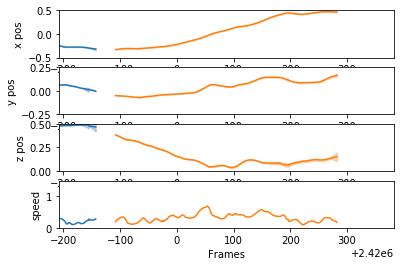

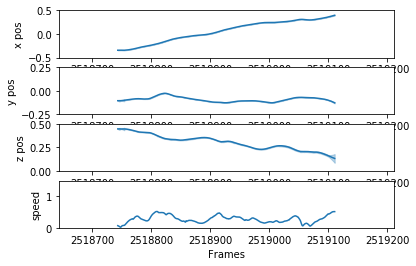

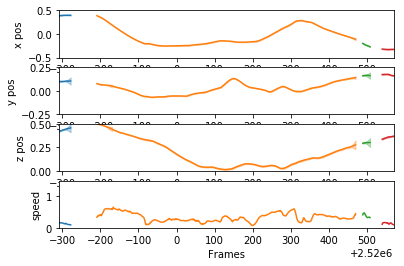

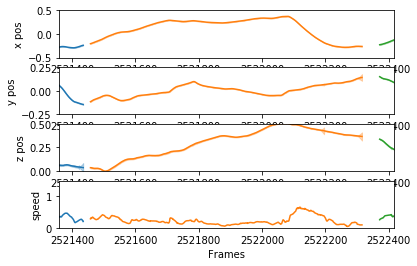

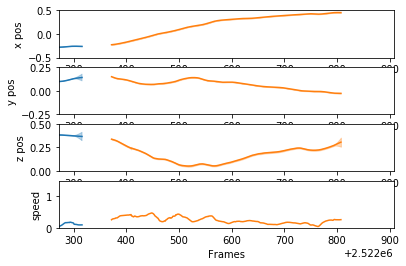

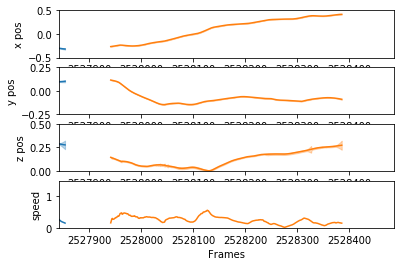

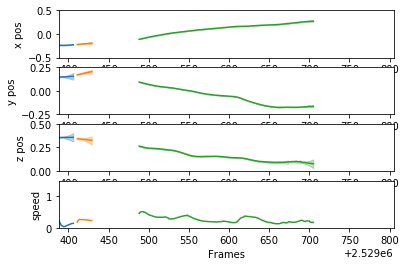

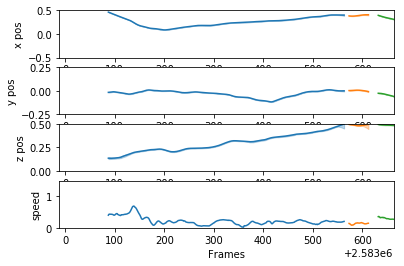

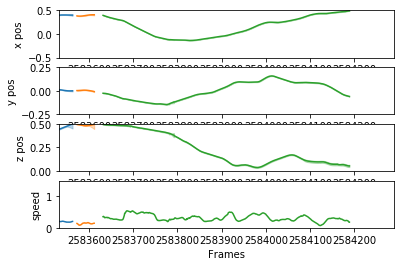

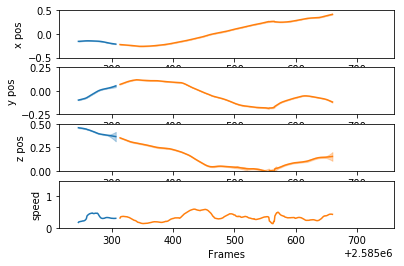

In [11]:
for obj_id in obj_ids[0:10]:
    frame_range = [df_3d_filtered[df_3d_filtered.obj_id==obj_id].frame.min() - 100, 
                  df_3d_filtered[df_3d_filtered.obj_id==obj_id].frame.max() + 100]
    
    print(frame_range)
    braid_analysis_plots.plot_3d_trajectory(df_3d, frame_range=frame_range)

### Plot the 2D data from the frame ranges corresponding to those trajectories

[2419792, 2420382]
[2518643, 2519211]
[2519691, 2520570]
[2521358, 2522416]
[2522272, 2522907]
[2527841, 2528486]
[2529388, 2529805]
[2582987, 2583663]
[2583532, 2584289]
[2585213, 2585760]


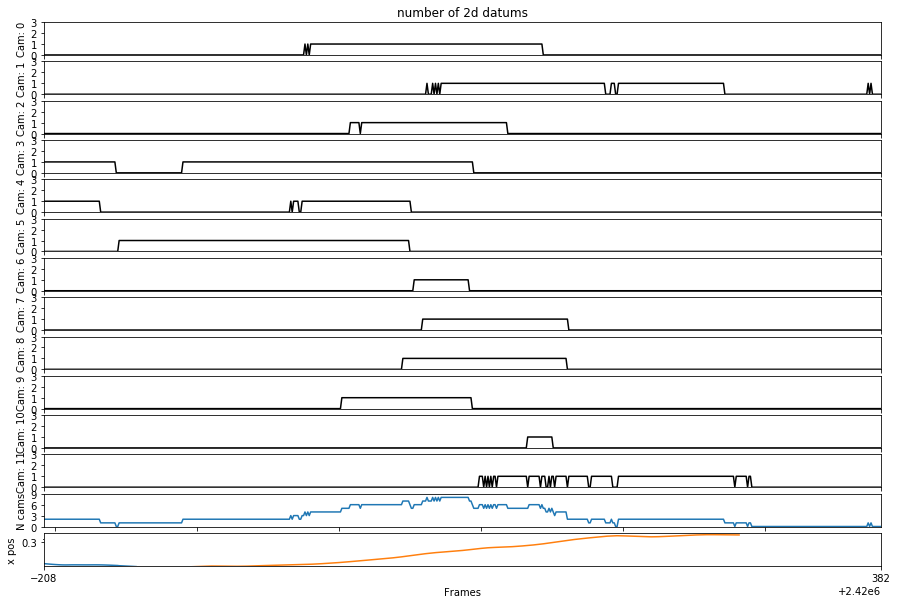

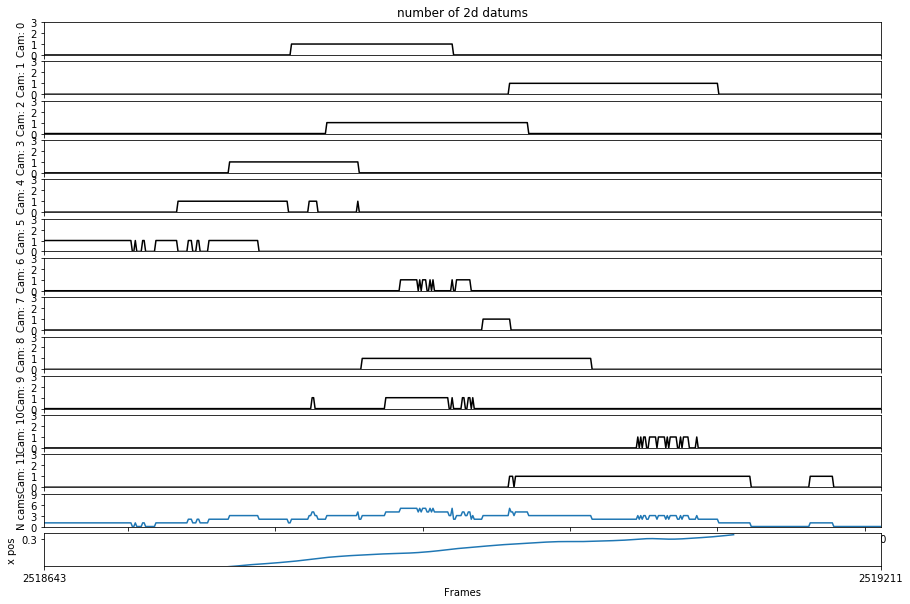

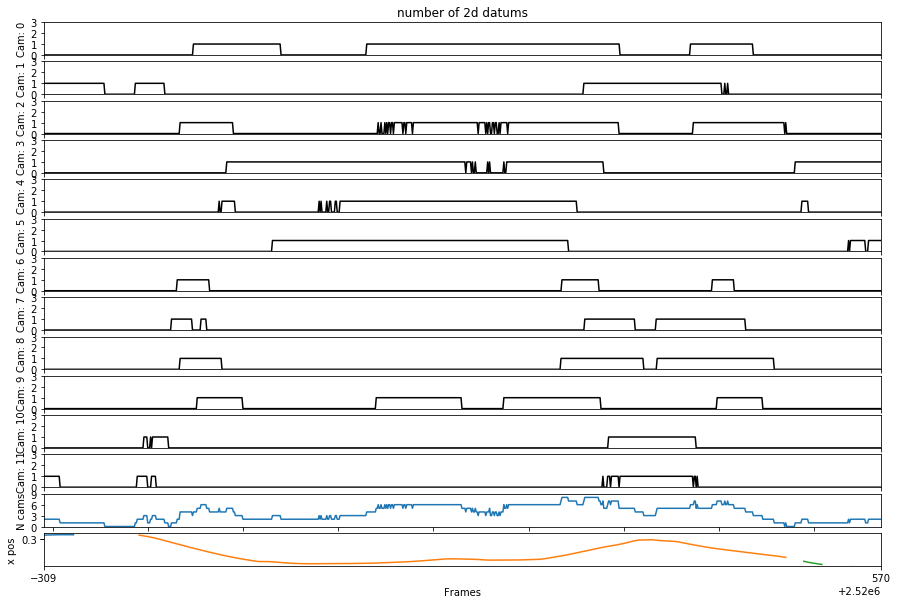

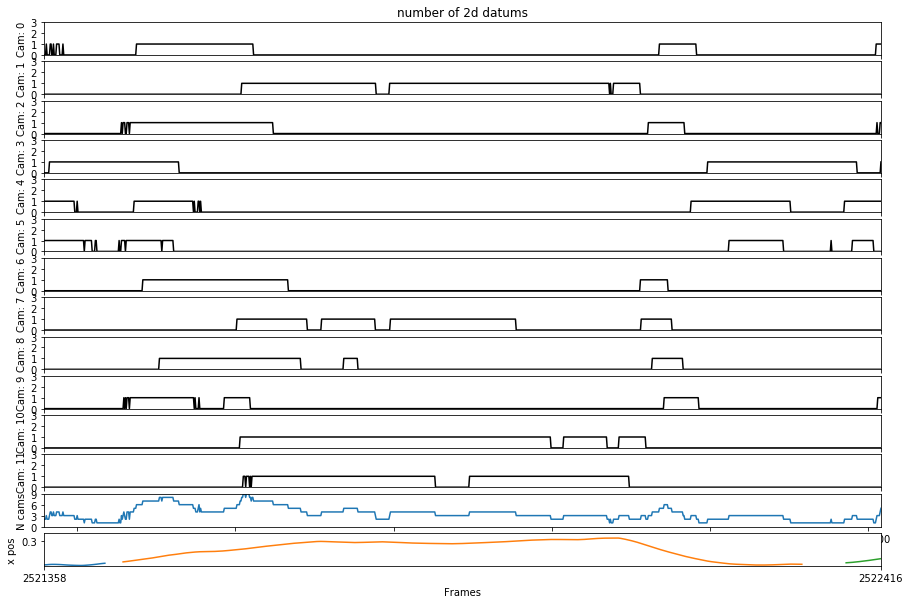

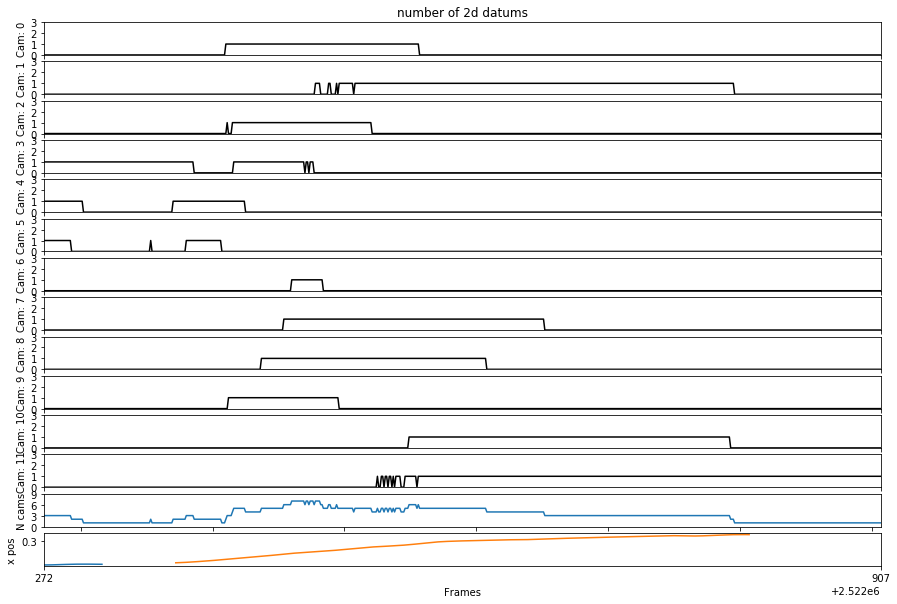

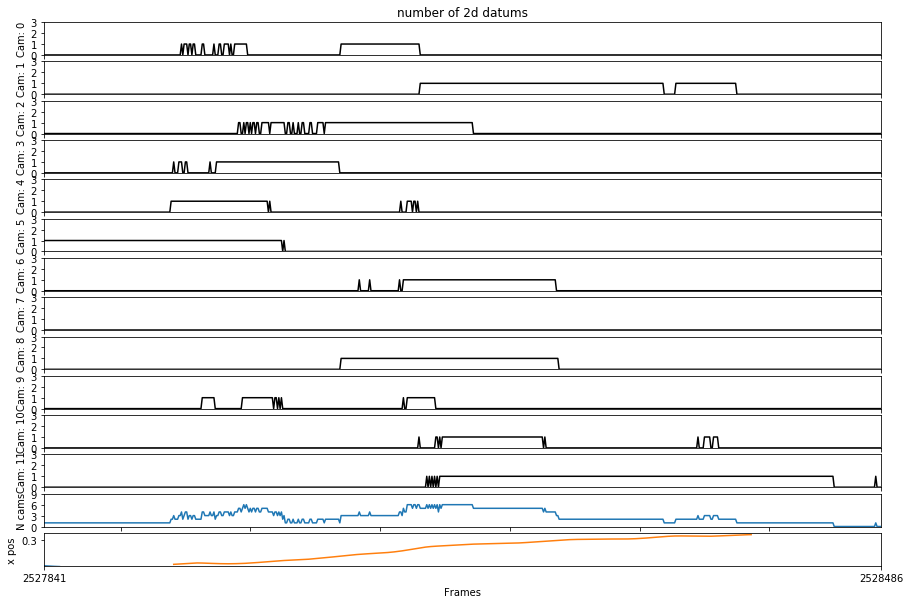

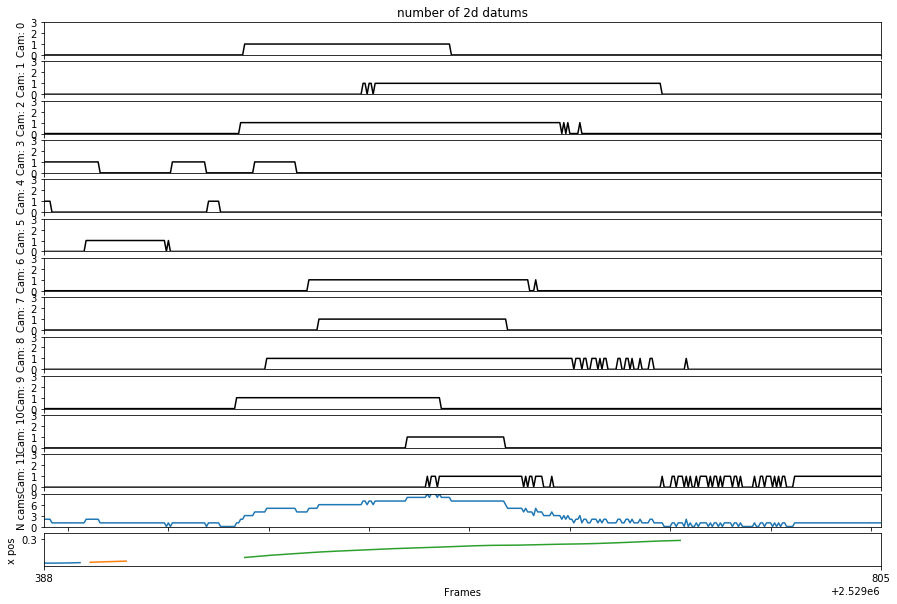

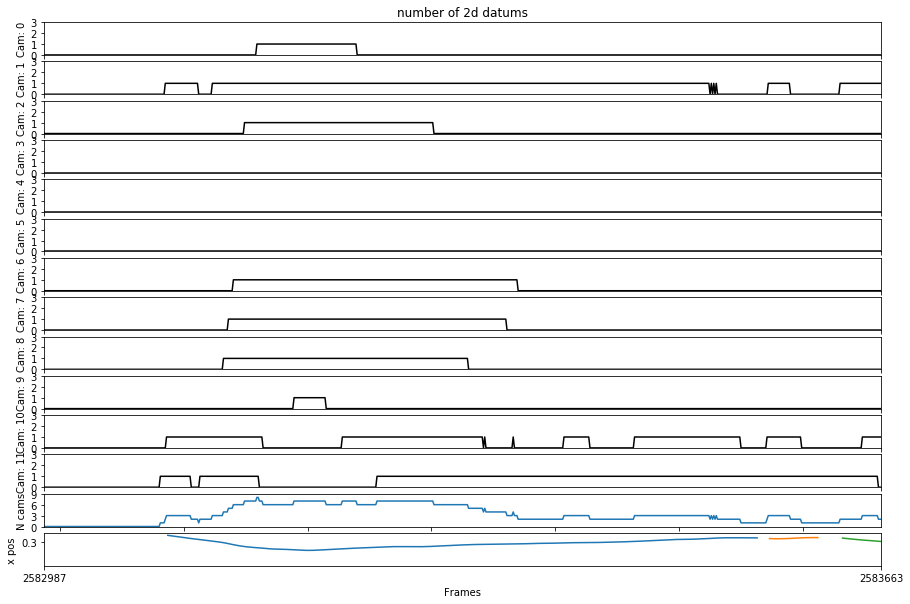

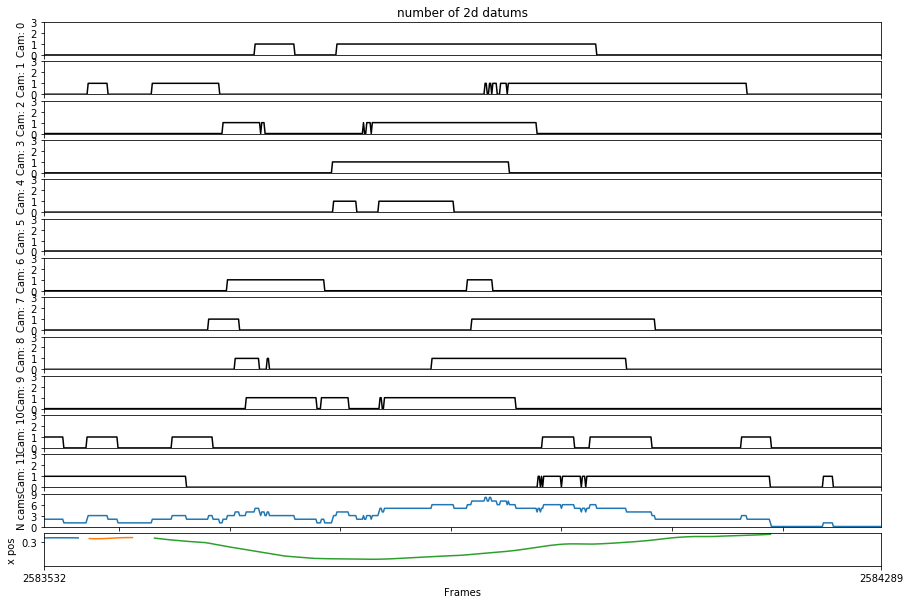

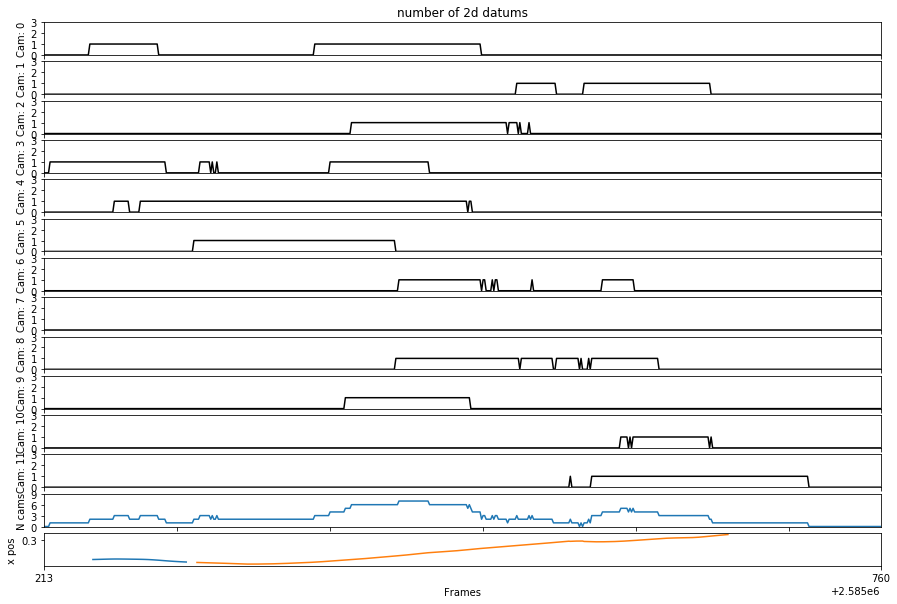

In [14]:
for obj_id in obj_ids[0:10]:
    frame_range = [df_3d_filtered[df_3d_filtered.obj_id==obj_id].frame.min() - 100, 
                  df_3d_filtered[df_3d_filtered.obj_id==obj_id].frame.max() + 100]
    
    print(frame_range)
    braid_analysis_plots.plot_2d_datums_per_camera(df_2d, df_3d, frame_range=frame_range)